# API's

* Application Programming Interface, it can refer to python files or functions.

* In actually they are third party services that we can use write some code to talk with them.

* We can connect to that third party API and download on a server and download adn incorporate in our program. 

* e.g. `request`

## Request
What is HTTP?

The Hypertext Transfer Protocol (HTTP) is designed to enable communications between clients and servers.

HTTP works as a request-response protocol between a client and server.

Example: A client (browser) sends an HTTP request to the server; then the server returns a response to the client. The response contains status information about the request and may also contain the requested content.

In [2]:
import requests
from pathlib import Path

In [12]:
response = requests.get(r'https://api.github.com/')
print('status code' , response.status_code)

status code 200


A `200` status means that your request was successful, whereas a `404` status means that the resource you were looking for was not found.

Others responses https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

Requests will automatically decode content from the server. (using `unicode`)

In [18]:
# If we want to see the data in string type encoding using unicode.
# response.encoding = 'ISO-8859-1' #
# we can change the encoding, but unicode works well.
print("response text: " , response.text[:100])

# If we want to get the data in binary type. 
# This is useful when IMG, gzip, and  others.
print("response binary: ",response.content[:100])

response text:  {"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://gi
response binary:  b'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://gi'


response status 200
Image saved!


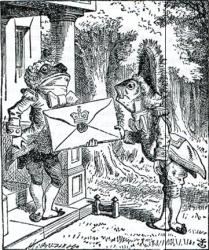

In [19]:
# request a image from a url
response = requests.get('https://www.crummy.com/software/BeautifulSoup/bs4/doc/_images/6.1.jpg')
print('response status', response.status_code)

# to save the image to a file
if response.status_code == 200:
    with open('6.1.jpg', 'wb') as f:
        f.write(response.content)
        f.close()
        print('Image saved!')

# if we want to display the image in the browser, we can use the following code:
from IPython import display
display.Image(response.content)

In [30]:
from pathlib import Path

path_init =  Path()

if not (path_init/'tracks').exists():
    (path_init/'tracks').mkdir()
    for year in range(1, 2):
        url_mp3 = rf'https://barronsbooks.com/tp/ielts/audio/d83rd2/Track%200{year}.mp3'
        file_mp3 = requests.get(url_mp3)
        # get the content of the file
        file_mp3_cont = file_mp3.content
        with open(rf'tracks/Track_{year}.mp3', 'wb') as file_mp3:
            file_mp3.write(file_mp3_cont)

* `headers` can give you useful information, such as the content type of the response payload and a time limit on how long to cache the response

In [39]:
print(response.headers)
print("content type: ",response.headers['Content-Type'])

{'Date': 'Fri, 08 Jul 2022 22:41:11 GMT', 'Server': 'Apache/2.4.18 (Ubuntu) OpenSSL/1.0.2g mod_wsgi/4.3.0 Python/2.7.12', 'Last-Modified': 'Fri, 08 Apr 2005 01:32:45 GMT', 'ETag': '"585b-3f432cd988940"', 'Accept-Ranges': 'bytes', 'Content-Length': '22619', 'Keep-Alive': 'timeout=15, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'image/jpeg'}
content type:  image/jpeg


If we are working with json file this can be decode in thsi format

In [42]:
resp = requests.get('https://filesamples.com/samples/code/json/sample1.json')
if resp.status_code == 200:
    print(resp.json())
    # In case the JSON decoding fails, resp.json() raises an exception

{'fruit': 'Apple', 'size': 'Large', 'color': 'Red'}


### Header

* In header we can change the `user-agent`. The main problem to get an error 403 Forbidden

In [43]:
url = 'https://inkafarma.pe/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
result = requests.get(url, headers=headers)

In [46]:
result.text[:100]

'<!doctype html>\n<html lang="es">\n<head>\n  <meta name="language" content="es-PE">\n  <meta charset="ut'

## Parameters

Given the `url` original `https://www.google.com/search` if we include this paramms `params`: `{'q':'facebook'}` with  This will result in a `new url` like `https://www.google.com/search?q=facebook`.

* Here `q` means query for Google. 

In [74]:
response = requests.get('https://www.google.com/search', params={'q':'facebook'})
response.status_code
response.url

'https://www.google.com/search?q=facebook'

Google Search URL Request Parameters

* Applications: `tbm`=app
* Books: `tbm`=bks
* Images: `tbm`=isch
* News: `tbm`=nws
* Patents: `tbm`=pts
* Video: `tbm`=vid

Acerca de los parametro de Google

* https://support.google.com/google-ads/answer/6277564?hl=es-419

Search url parametes

* https://stenevang.wordpress.com/2013/02/22/google-advanced-power-search-url-request-parameters/

More aboat of paramans

* https://serpapi.com/search-api

In [77]:
params = {
    "q": "minecraft shaders 8k photo",
    "tbm": "isch",
    "ijn": "0",
}

html = requests.get("https://www.google.com/search", params=params,)
html.url

'https://www.google.com/search?q=minecraft+shaders+8k+photo&tbm=isch&ijn=0.1'

In [75]:
# An general example 

payload = {'key1': 'value1', 'key2': 'value2'}
r = requests.get('https://httpbin.org/get', params=payload)
print(r.url)

# But a key can be have to values
payload = {'key1': 'value1', 'key2': ['value2', 'value3']}
r = requests.get('https://httpbin.org/get', params=payload)
print(r.url)

https://httpbin.org/get?key1=value1&key2=value2
https://httpbin.org/get?key1=value1&key2=value2&key2=val3


In [ ]:
import requests

# Search GitHub's repositories for requests
response = requests.get(
    'https://api.github.com/search/repositories',
    params={'q': 'requests+language:python'},
)

print('URL',response.url)
# Inspect some attributes of the `requests` repository
json_response = response.json()
repository = json_response['items'][0]
print(f'Repository name: {repository["name"]}')  # Python 3.6+
print(f'Repository description: {repository["description"]}')  # Python 3.6+

URL https://api.github.com/search/repositories?q=requests%2Blanguage%3Apython
Repository name: grequests
Repository description: Requests + Gevent = <3


### To post data in format json

In [53]:
url  = 'http://...my_web.com' # when we create one we will post
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
payload = {'key1': 'value1', 'key2': 'value2'}
post_json = requests.get(url, headers=headers, json=payload)
post_json

# to post data on a webpage in json data type
# don't work since the link is failed

<Response [200]>

In [ ]:
resp = requests.get(post_json.url, headers=headers)

https://realpython.com/python-requests/

https://docs.python-requests.org/en/latest/

# os

In [ ]:
import os, glob, pathlib
import re

In [ ]:
WD_FILE = os.getcwd()  # Working Directory where the file is running
print(WD_FILE)

In [ ]:
print('Current Directory: ' , os.getcwd())      # current directory
print( 'List of files in cwd: ',os.listdir())   # list of files in cwd

In [ ]:
new_path = r'C:\Users\LENOVO\Desktop\python_course\jupyter'
print( 'choose a new wd (working directory): ' ,new_path)              
os.chdir(new_path)

In [ ]:
os.chdir(WD_FILE) # came back where the file is running.

`os.walk()` generate the file names in a directory tree by walking the tree either top-down or bottom-up. For each directory in the tree rooted at directory top (including top itself), it yields a 3-tuple (dirpath, dirnames, filenames).

* root : Prints out directories only from what you specified.
* dirs : Prints out sub-directories from root.
* files : Prints out all files from root and directories.

In [ ]:
for root, dirs, files in os.walk(r'C:\Users\LENOVO\Desktop\python_course\datascience\web_scraping', topdown=True):
    files_str = '-'.join(files)
    
    if re.search(r'web_scraping.*\.(?:txt|rtf)', files_str):
        print(root)     # in Spanish is ruta
        print(dirs)     # in spanish is carpetas
        print(files)    # 
        print('-------')

To create new dir, first we have to expand the user with the name if dir.

In [ ]:
os.path.expanduser(r'some_data')

if not os.path.exists('.\some_data'): # if not existe the dir, we create
    os.makedirs('.\some_data')

# Path
`pathlib`


In [ ]:
from pathlib import Path

In [ ]:
path_some_01 =Path('some_data_01')
path_some_01.mkdir(parents=True, exist_ok=True)

In [ ]:
data_gh = """'This is Love' is
a song of George Harrison
"""

In [ ]:
name_file = 'my_data.txt'
if not (path_some_01/name_file).exists():
    # print((path_some_01/name_file).absolute())
    (path_some_01/name_file).open('w').write(data_gh)